In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Loading Power Data and Cleanup

In [8]:
power_df = pd.read_csv('electricity_data.csv')
power_df = power_df.iloc[1:]
power_df

/tmp/ipykernel_5625/1874362766.py:1: DtypeWarning: Columns (2,3,4,5,6,7,8,9,10,11,12,13,14) have mixed types. Specify dtype option on import or set low_memory=False.
  power_df = pd.read_csv('electricity_data.csv')


,Date,Time,Generation(MW),Demand(MW),Loadshed,Gas,Liquid Fuel,Coal,Hydro,Solar,Wind,India,India.1,India.2,Nepal,Remarks
1,05-01-2024,06:00:00,6751.0,6751,0,3738,12,2399,86,0.0,9.0,435,72,NaN,NaN,NaN
2,05-01-2024,05:00:00,6576.0,6576,0,3575,0,2403,86,0.0,7.0,435,70,NaN,NaN,NaN
3,05-01-2024,04:00:00,6686.0,6686,0,3667,0,2409,86,0.0,10.0,444,70,NaN,NaN,NaN
4,05-01-2024,03:00:00,6871.0,6871,0,3880,0,2393,86,0.0,9.0,435,68,NaN,NaN,NaN
5,05-01-2024,02:00:00,7215.0,7215,0,4124,0,2491,86,0.0,8.0,430,76,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36665,30-12-2019,23:00:00,6920.0,6920,0,6170,48,270,47,0.0,NaN,310,86,NaN,NaN,NaN
36666,30-12-2019,22:00:00,7497.0,7497,0,6257,569,280,46,0.0,NaN,436,94,NaN,NaN,NaN
36667,30-12-2019,21:00:00,8080.0,8080,0,6460,847,280,45,0.0,NaN,436,100,NaN,NaN,NaN
36668,30-12-2019,20:00:00,8419.0,8419,0,6337,1306,280,46,0.0,NaN,436,102,NaN,NaN,NaN


In [12]:
power_df.rename(columns={
	'Generation(MW)': 'Generation',
	'Demand(MW)': 'Demand',
 	'India': 'India_Bheramara',
  'India.1': 'India_Tripura',
  'India.2': 'India_Adani',
}, inplace=True)

In [16]:
power_df['Loadshed'] = power_df['Loadshed'].astype(float)
power_df['Generation'] = power_df['Generation'].astype(float)
power_df['Demand'] = power_df['Demand'].astype(float)

__Clean Up__

In [17]:
# Invalid Dates
power_df.loc[(power_df['Date'] == '09-02-0021'), 'Date'] = '30-12-2023'
power_df.loc[(power_df['Date'] == '11-03-0080'), 'Date'] = '01-11-2023'
power_df.loc[(power_df['Date'] == '05-08-0008'), 'Date'] = '05-10-2023'
power_df.loc[(power_df['Date'] == '13-06-0050'), 'Date'] = '31-07-2023'

# Change 24:00 to 00:00
power_df.loc[(power_df['Time'] == '24:00:00'), 'Time'] = '00:00:00'

# Change incorrect formats (KW to MW) and values
power_df.loc[(power_df['Generation'] == 64526500), 'Generation'] = 6452
power_df.loc[(power_df['Demand'] == 117000), 'Demand'] = 11700
power_df.loc[(power_df['Demand'] == 156050), 'Demand'] = 15605
power_df.loc[(power_df['Demand'] == 104860), 'Demand'] = 10486
power_df.loc[(power_df['Demand'] == 20587), 'Demand'] = 10587

In [18]:
power_df['date_time'] = power_df['Date'].astype(str) + ' ' + power_df['Time'].astype(str)
power_df['date_time'] = pd.to_datetime(power_df['date_time'], dayfirst=True)

In [40]:
power_df = power_df.sort_values(by='date_time')

In [44]:
power_df['Year'] = power_df['date_time'].dt.year
power_df['Month'] = power_df['date_time'].dt.month

In [46]:
power_df.to_csv('electricity_data_clean.csv', index=False)

# EDA

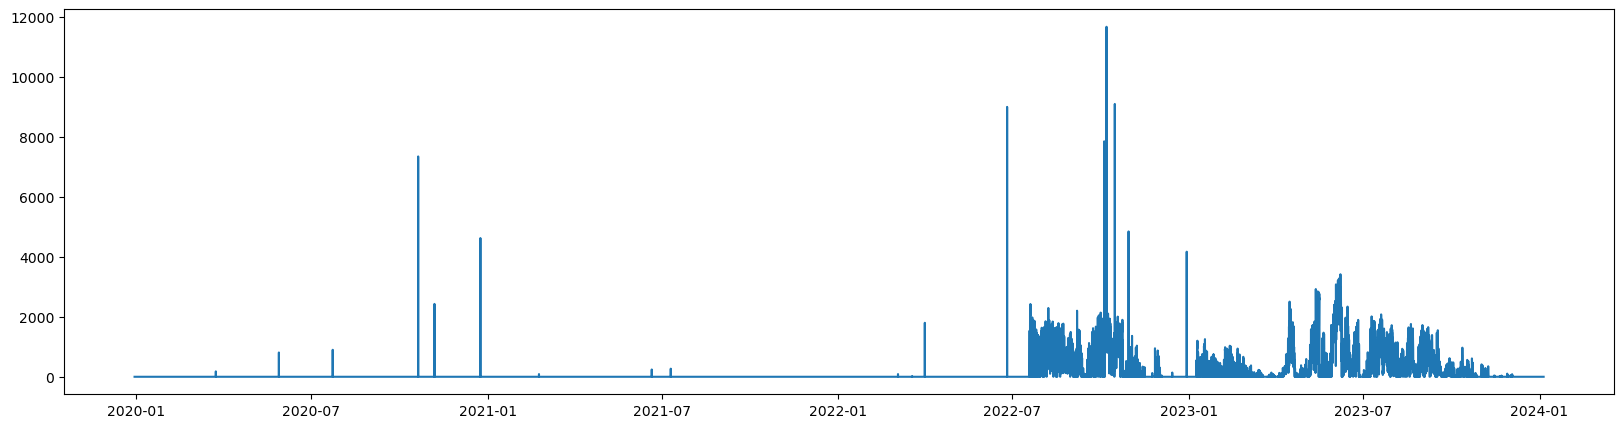

In [43]:
plt.figure(figsize=(20, 5))
plt.plot(power_df['date_time'], power_df['Loadshed'])

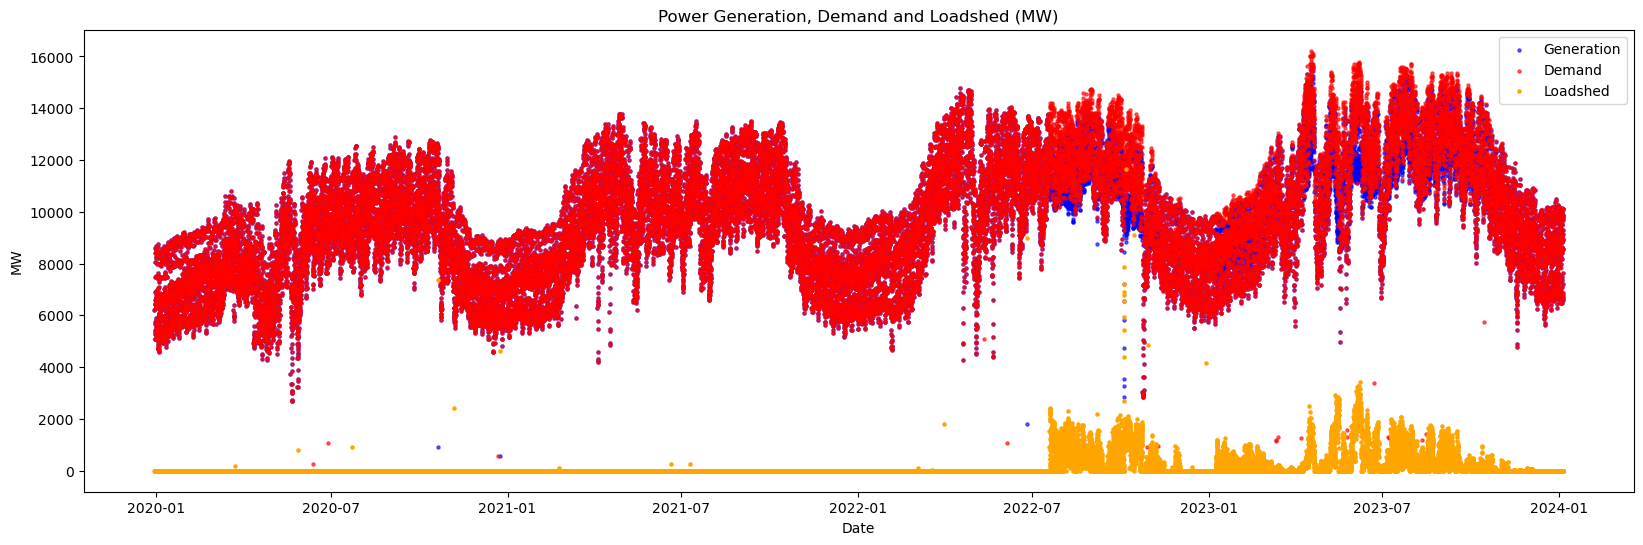

In [42]:
plt.figure(figsize=(20, 6))
plt.scatter(power_df['date_time'], power_df['Generation'], s=5, color='blue', alpha=0.6, label='Generation')
plt.scatter(power_df['date_time'], power_df['Demand'], s=5, color='red', alpha=0.6, label='Demand')
plt.scatter(power_df['date_time'], power_df['Loadshed'], s=5, color='orange', label='Loadshed')
plt.title('Power Generation, Demand and Loadshed (MW)')
plt.xlabel('Date')
plt.ylabel('MW')
plt.legend()

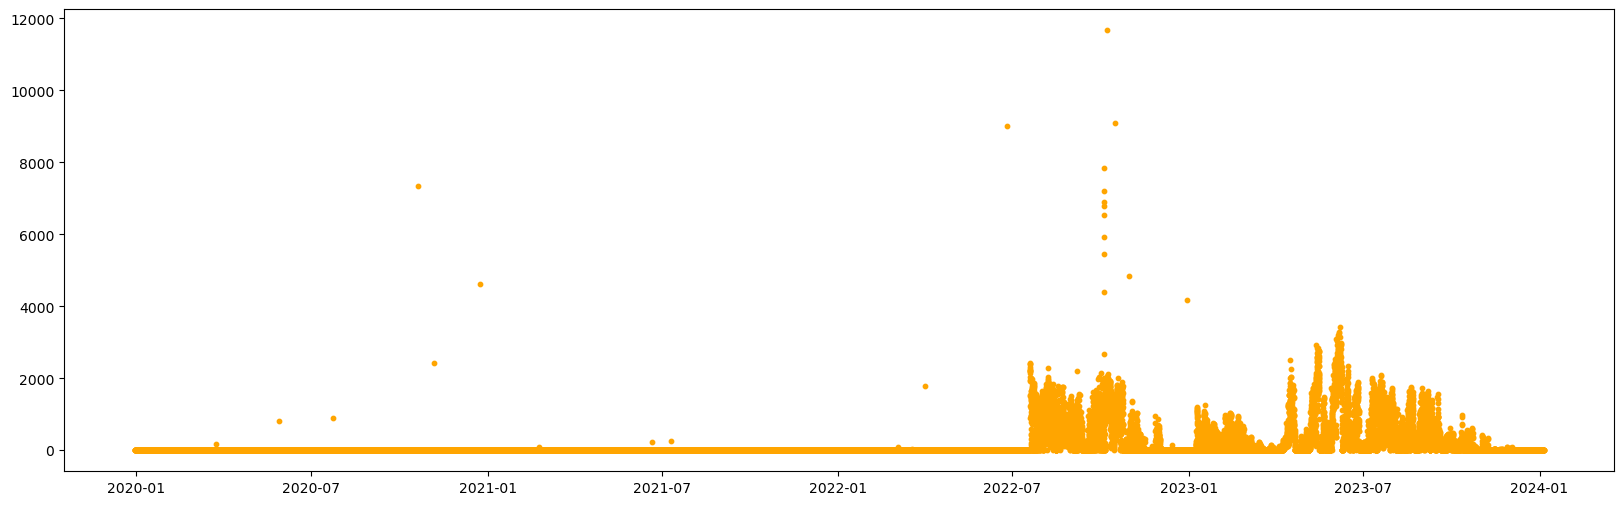

In [35]:
plt.figure(figsize=(20, 6))
plt.scatter(power_df['date_time'], power_df['Loadshed'], s=10, color='orange')

In [45]:
power_df.groupby('Year')['Loadshed'].mean()

Year
2019      0.000000
2020      1.781544
2021      0.066075
2022    218.690750
2023    310.615671
2024      0.000000
Name: Loadshed, dtype: float64